<a href="https://colab.research.google.com/github/emilyxietty/DigitRecognizer/blob/main/digit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognizer**

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.12
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [ ]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


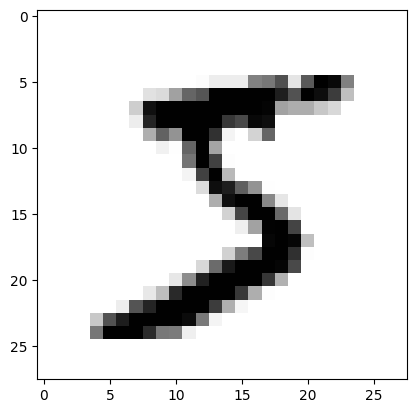

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

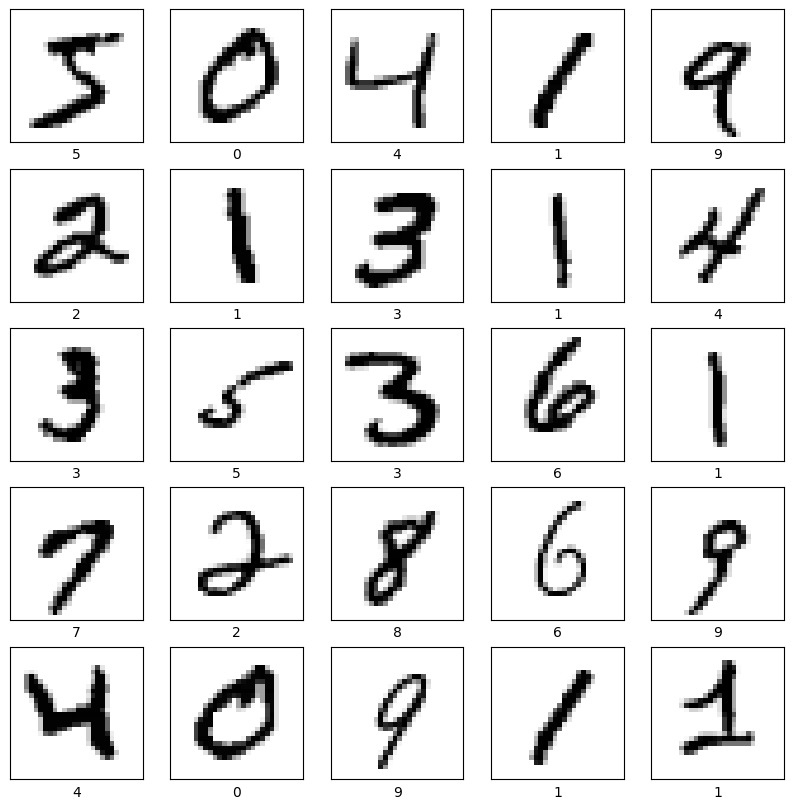

In [ ]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [ ]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Randomly rotate the images within the range of [-10, 10] degrees
    width_shift_range=0.1,  # Randomly shift the images horizontally by 10% of the total width
    height_shift_range=0.1,  # Randomly shift the images vertically by 10% of the total height
    shear_range=0.1,  # Randomly apply shearing transformations
    zoom_range=0.1,  # Randomly zoom into the images
    fill_mode='nearest'  # Fill any newly created pixels with the nearest existing pixel value
)


In [ ]:
augmented_data = datagen.flow(x_train_normalized, y_train, batch_size=32)


In [ ]:
augmented_data


In [ ]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

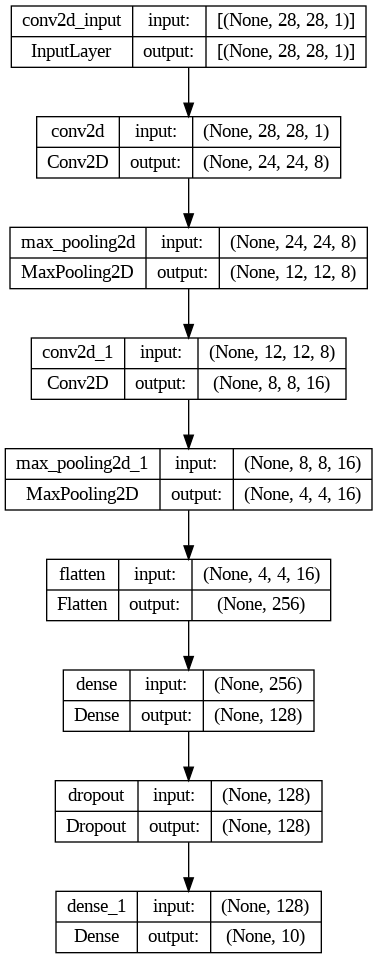

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    # x_train_normalized,
    # y_train,
    augmented_data,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 38s 15ms/step - loss: 0.3942 - accuracy: 0.8744 - val_loss: 0.0584 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1512 - accuracy: 0.9532 - val_loss: 0.0539 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1164 - accuracy: 0.9635 - val_loss: 0.0322 - val_accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0957 - accuracy: 0.9709 - val_loss: 0.0264 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0845 - accuracy: 0.9750 - val_loss: 0.0314 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0785 - accuracy: 0.9759 - val_loss: 0.0298 - val_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0742 - accuracy: 0.9777 - val_loss: 0.0242 -

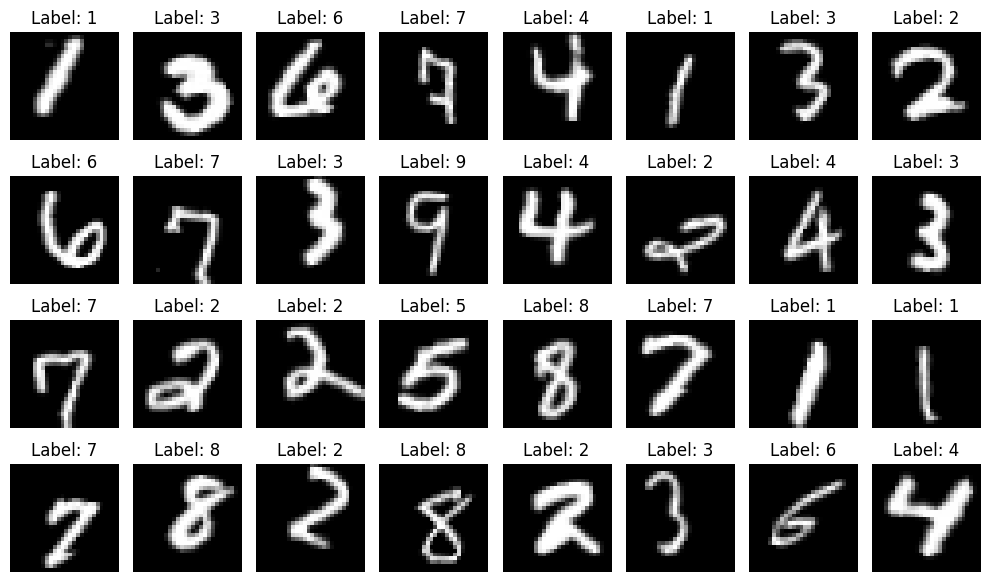

In [ ]:
images, labels = next(augmented_data)

# Display the augmented images
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {labels[i]}')
plt.tight_layout()
plt.show()

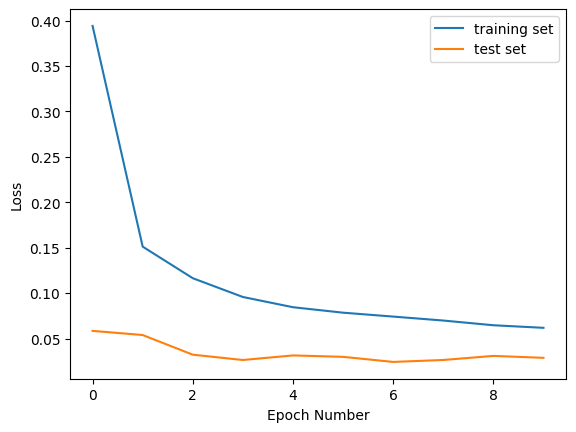

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

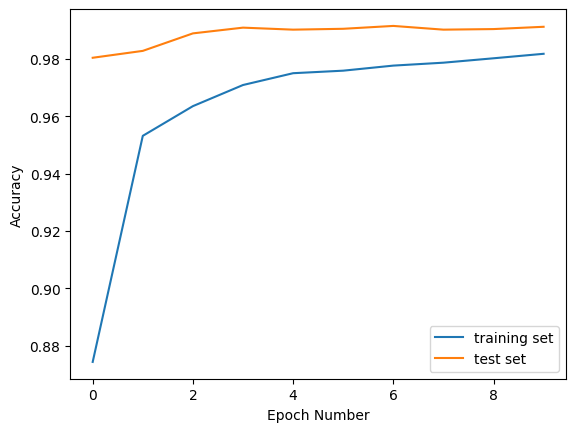

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

313/313 [==============================] - 1s 2ms/step
predictions_one_hot: (10000, 10)


In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.744282e-09,3.413916e-07,2.400593e-05,3.804581e-05,6.166711e-07,2.077984e-10,7.417174e-14,9.999276e-01,3.979821e-08,9.381771e-06
1,1.368739e-11,3.884197e-07,9.999996e-01,4.913821e-08,5.046865e-10,1.887935e-13,7.097959e-09,3.490920e-08,3.388658e-11,5.332102e-12
2,1.592472e-08,9.999996e-01,7.263996e-09,7.039193e-12,3.286824e-08,1.370492e-08,1.870798e-08,3.080220e-07,2.530089e-08,9.589352e-09
3,9.991345e-01,1.784982e-08,1.515772e-06,1.993155e-07,2.243886e-06,1.357343e-05,5.454919e-04,1.320405e-08,3.465948e-05,2.678924e-04
4,1.771191e-10,1.419038e-07,2.105518e-09,9.964533e-12,9.998724e-01,3.350896e-13,1.668534e-08,1.600976e-08,6.516154e-09,1.274540e-04
...,...,...,...,...,...,...,...,...,...,...
9995,3.783444e-13,2.752704e-07,9.999987e-01,7.386578e-08,3.044149e-10,9.132146e-14,2.231732e-09,9.384652e-07,2.227827e-10,5.176349e-13
9996,3.350068e-12,8.525815e-07,5.334372e-09,9.999986e-01,9.311407e-14,6.176801e-07,6.824208e-17,3.449456e-12,2.310200e-11,2.297636e-08
9997,1.842830e-12,8.223307e-09,1.713227e-09,2.597585e-11,9.999939e-01,1.332057e-10,1.806801e-08,6.631834e-08,4.155583e-07,5.515603e-06
9998,1.510018e-07,2.510775e-12,1.112773e-12,1.750719e-07,1.191903e-11,9.998172e-01,1.109842e-07,3.488876e-13,1.815722e-04,8.325208e-07


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

print(predictions[0])

7


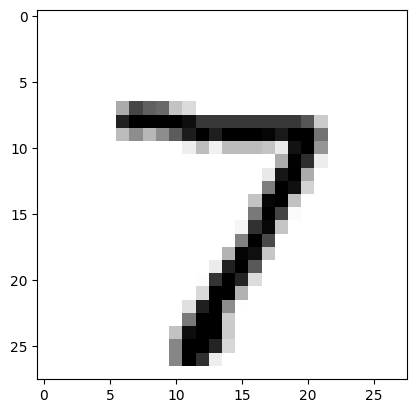

In [ ]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

<ipython-input-34-ea5c5cf24195>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


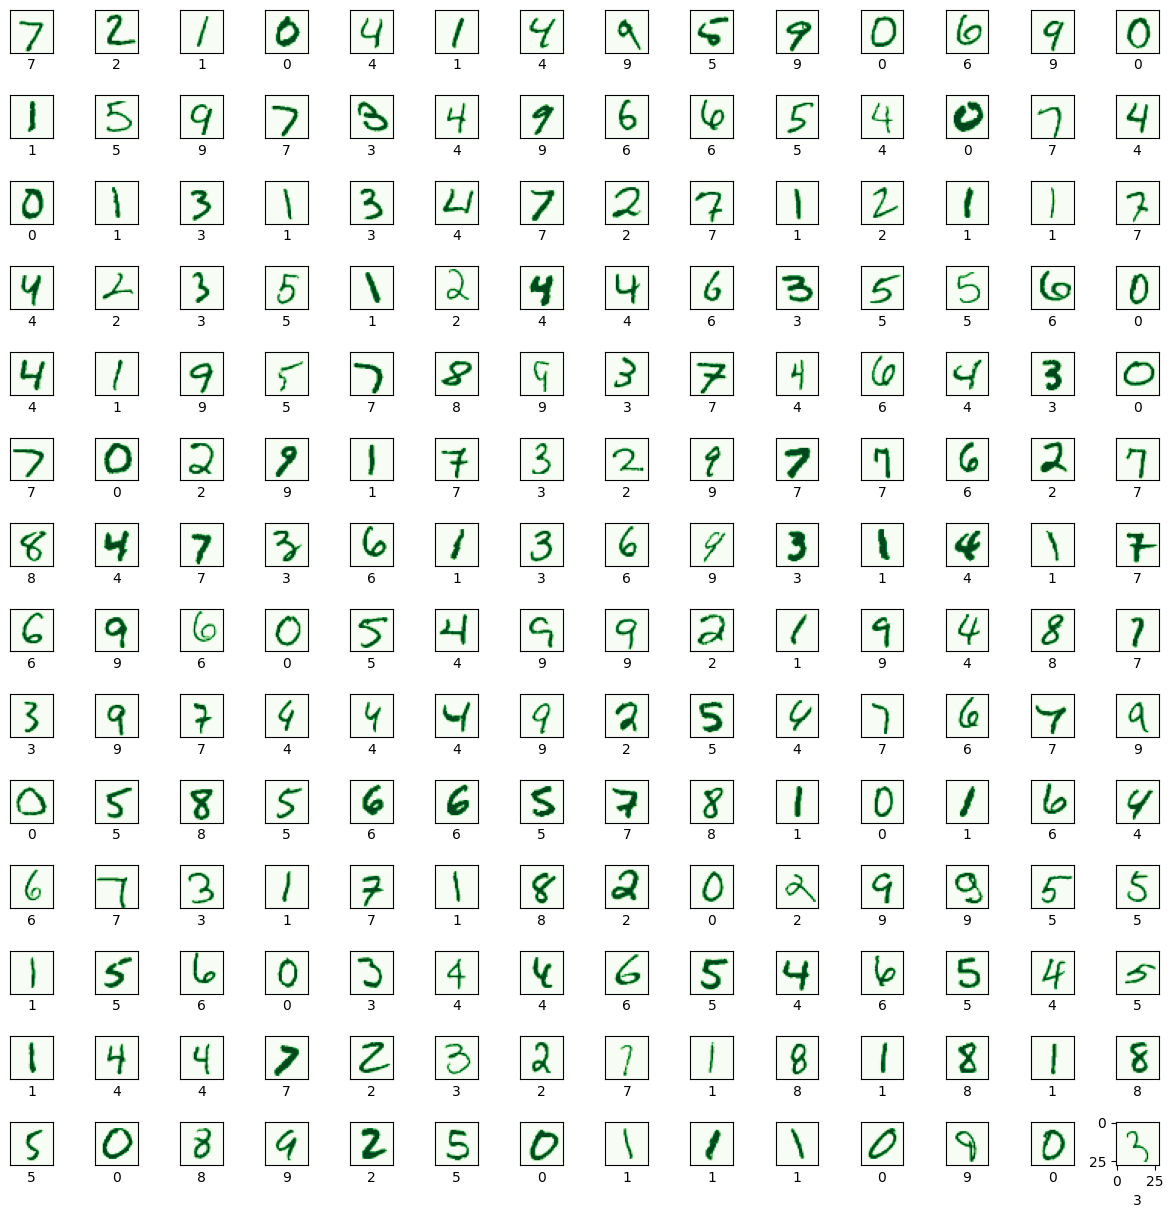

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

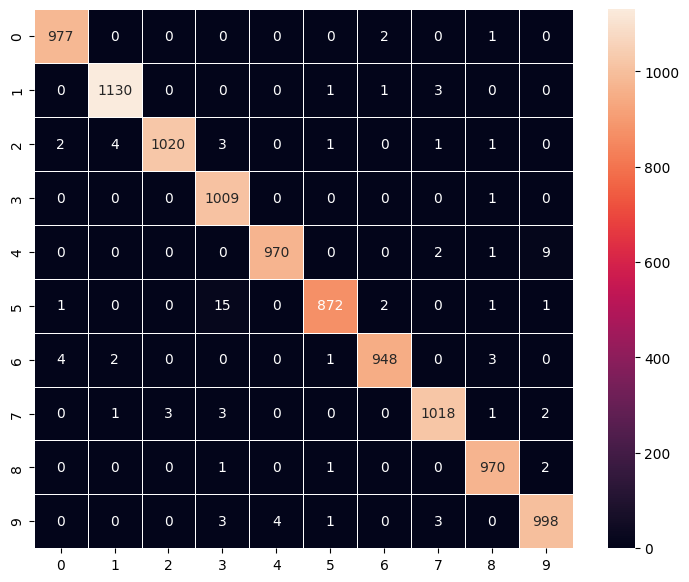

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
# Save the entire model as a `.keras` zip archive.
model.save('model.keras')

## **Testing with an Input Image (number 5)**
Image is not provided. Add your own image to test.

In [ ]:
from PIL import Image
import numpy as np

model2 = tf.keras.models.load_model("model.keras")

# Load the image
img = Image.open('5.png')

# Resize the image to 28x28 pixels
img = img.resize((28, 28))

# Convert the image to grayscale
img = img.convert('L')

# Convert the image data to a numpy array and normalize
img_array = np.array(img) / 255.0

# Add an extra dimension for the batch size and another for the channel
img_array = img_array.reshape(1, 28, 28, 1)


FileNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Get the prediction
prediction = model2.predict(img_array)

# The output of the model is a 10-element vector with the probabilities for each digit.
# Use argmax to get the digit with the highest probability.
predicted_digit = np.argmax(prediction)
print('The number is: ', predicted_digit)

In [ ]:
# Squeeze to remove single-dimensional entries from the shape of an array.
prediction = np.squeeze(prediction)

# Create a bar plot
plt.figure(figsize=(9, 3))
plt.bar(range(10), prediction)
plt.xlabel('Digits')
plt.ylabel('Probabilities')
plt.title('Predicted probabilities of Digits')
plt.xticks(range(10))
plt.show()

## **Creating User Interface via Streamlit**

The remaining will be in app.py

In [ ]:
!pip install streamlit
!pip install streamlit-drawable-canvas
!pip install opencv-python